# Analyzing Baby Names
*An Analysis of the Names given to Babys in the United States between 1880 - 2017*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
years = list(range(1880, 2018))
data = []

# Reading Data Files
*files from  www.ssa.gov/oact/babynames/limits.html (nation-wide data)*

In [3]:
for y in years:
    fn = f'yob{y}.txt'
    df = pd.read_csv(fn, header=None, index_col=0)
    df['year'] = y
    data.append(df)
df = pd.concat(data)

In [4]:
df.columns = ['Gender', 'Occurence', 'year']
df.head()

,Gender,Occurence,year
0,,,
Mary,F,7065,1880
Anna,F,2604,1880
Emma,F,2003,1880
Elizabeth,F,1939,1880
Minnie,F,1746,1880


# Comparing Genders
*over full timespan*

In [5]:
gendergroup = df.groupby('Gender')
gp = gendergroup['Occurence'].sum()

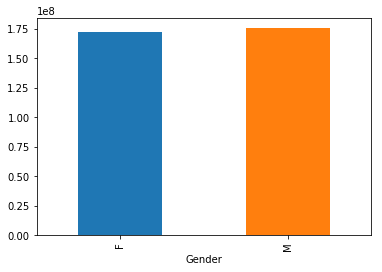

In [6]:
%matplotlib inline
gp.plot.bar()

# Frequent Babynames
*Which Babynames occur at least 150.000 times*

In [7]:
df.reset_index(inplace=True)

df.columns = ['names', 'Gender', 'Occurence', 'year']

In [8]:
fre = df.groupby('names')['Occurence'].sum()
ls = fre.to_frame()

frequent = ls[ls['Occurence'] > 1500000]
f = frequent.index

print("The", str(len(f)), "most popular names:")
for i in f:
    print(i)

The 16 most popular names:
Charles
Christopher
Daniel
David
Elizabeth
James
John
Joseph
Mary
Matthew
Michael
Patricia
Richard
Robert
Thomas
William


In [9]:
df.set_index(['names'], inplace=True)

# Visualizing popular or famous names

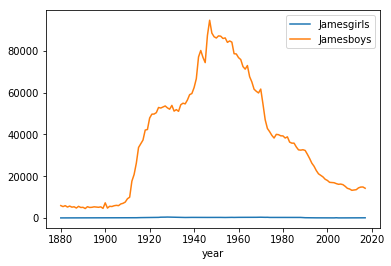

In [10]:

def plot_name(name):
    ls = df.loc[name]
    female = ls[ls['Gender'] == 'F']
    male = ls[ls['Gender'] == 'M']
    girls = female.groupby(['year'])['Occurence'].sum()
    boys = male.groupby(['year'])['Occurence'].sum()
    
    try:
        girls.plot(x='year', y='Occurence', label=name + 'girls')
        boys.plot(x='year', y='Occurence', label=name + 'boys')
        plt.legend()
    except:
        pass

plot_name('James')

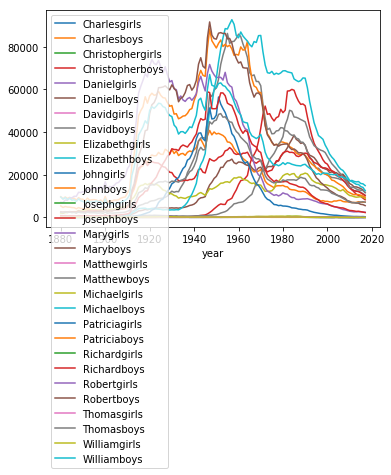

In [11]:
plot_name('Charles')
plot_name('Christopher')
plot_name('Daniel')
plot_name('David')
plot_name('Elizabeth')
plot_name('John')
plot_name('Joseph')
plot_name('Mary')
plot_name('Matthew')
plot_name('Michael')
plot_name('Patricia')
plot_name('Richard')
plot_name('Robert')
plot_name('Thomas')
plot_name('William')

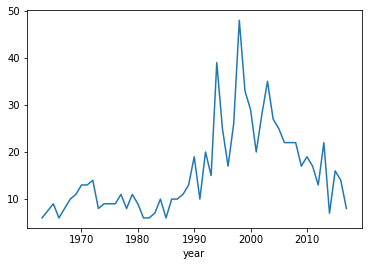

In [12]:
plot_name('Katja')

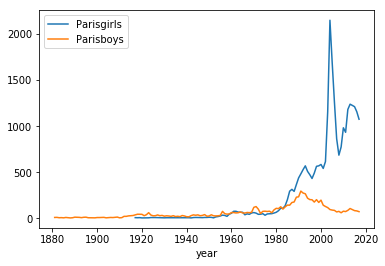

In [13]:
plot_name('Paris')

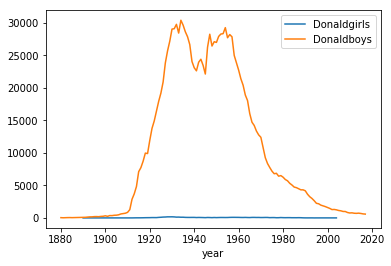

In [14]:
plot_name('Donald')

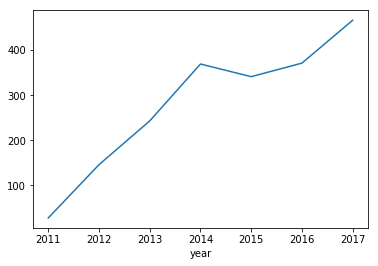

In [15]:
plot_name('Khaleesi')

# Total Birthrate in the U.S. over time

In [16]:
yearg = df.groupby('year')
yeargroup = yearg['Occurence'].sum()
yeargroup1 = yeargroup.to_frame()

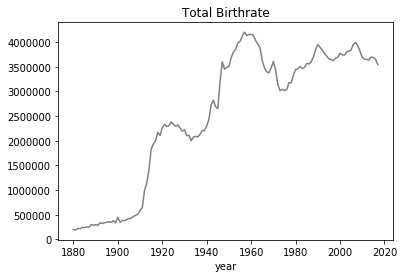

In [17]:
%matplotlib inline
yeargroup.plot(x='year', y='Occurence', color='grey', title="Total Birthrate")
plt.savefig('x.png', dpi=300)

**Differentiated total birthrate over time by boys and girls**

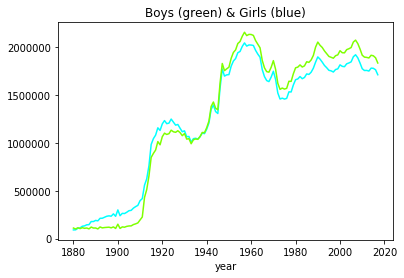

In [18]:
female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']

girls = female.groupby('year')['Occurence'].sum()
girls.plot(x='year', y='Occurence', color='#00FFFF')

boys = male.groupby('year')['Occurence'].sum()
boys.plot(x='year', y='Occurence', color='#7FFF00', title="Boys (green) & Girls (blue)")

# Normalizing
*Calculating the relative frequency of names in any given year*

In [19]:
df.reset_index(inplace=True)

In [20]:
df2 = df.merge(yeargroup1, 'left', 'year')
df2.columns = ('names','Gender', 'occurence', 'year', 'birthrate')
df['relative_frequency'] = df2['occurence'] / df2['birthrate']
df.head()

,names,Gender,Occurence,year,relative_frequency
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


*plotting names again, relative to overall births*

In [21]:
df.set_index('names', inplace=True)

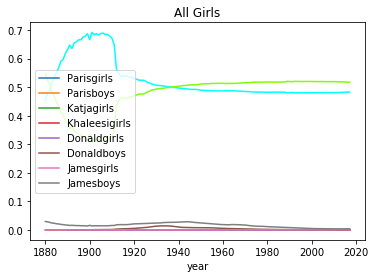

In [22]:
def plot_relative(name):
    ls = df.loc[name]
    female = ls[ls['Gender'] == 'F']
    male = ls[ls['Gender'] == 'M']
    girls = female.groupby(['year'])['relative_frequency'].sum()
    boys = male.groupby(['year'])['relative_frequency'].sum()
    
    try:
        girls.plot(x='year', y='Occurence', label=name + 'girls')
        boys.plot(x='year', y='Occurence', label=name + 'boys')
        plt.legend()
    except:
        pass
    
plot_relative('Paris')
plot_relative('Katja')
plot_relative('Khaleesi')
plot_relative('Donald')
plot_relative('James')

female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']
girls = female.groupby(['year'])['relative_frequency'].sum()
boys = male.groupby(['year'])['relative_frequency'].sum()

girls.plot(x='year', y='relative_frequency', color='#00FFFF', title="All Boys")
boys.plot(x='year', y='relative_frequency', color='#7FFF00', title="All Girls")

In [23]:
df.reset_index(inplace=True)


# Name diversity

*Have Babynames become more diverse over time?*

**Definition of Diversity** *(Assumptions this calculation is based on):*

* The fact or quality of being diverse; difference.
* A point or respect in which things differ.
* Variety or multiformity.


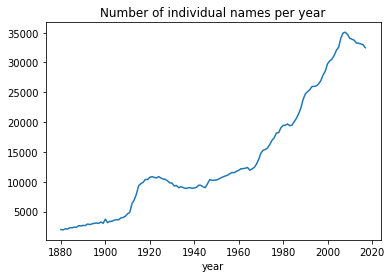

In [24]:
div = df.groupby('year')['names'].count()
div.plot(x='year', y='names', title=("Number of individual names per year"))

**Conclusion:**

*The diversity of names has grown constantly over the centuries with a notable rise in the 1920's and a slight deduction since 2010*

# Name length
*Finding the 10 longest names given since 1880*

In [25]:
df.columns = ['names', 'gender', 'occurence', 'year', 'relative_frequency']

def counter(x):
    return (len(x))

df['namelength'] = df['names'].apply(lambda x: counter(x))

In [26]:
longest = df.sort_values(by='namelength', ascending=False)
print(longest['names'][0:9])

1273784    Christopherjame
1485009    Christianmichae
1011480    Mariadelosangel
1331306    Christianjoseph
1033393    Mariadelosangel
939066     Christopherjohn
1422999    Ryanchristopher
1824466    Christopherjohn
1143663    Christopherjohn
Name: names, dtype: object


# First letter statistics

In [27]:
def get_first(x):
    return x[0]

df['first_letter'] = df['names'].apply(lambda x: get_first(x))
df.head()

,names,gender,occurence,year,relative_frequency,namelength,first_letter
0,Mary,F,7065,1880,0.035065,4,M
1,Anna,F,2604,1880,0.012924,4,A
2,Emma,F,2003,1880,0.009941,4,E
3,Elizabeth,F,1939,1880,0.009624,9,E
4,Minnie,F,1746,1880,0.008666,6,M


**Names starting with an A**

In [28]:
dfA = df[df['first_letter'] == 'A']
A = dfA['names'].unique()
print(str(len(A)), "names start with an 'A'")

10292 names start with an 'A'


**Relative occurence of initials over time**

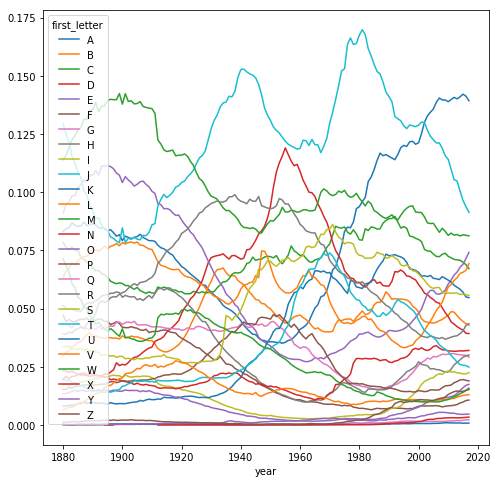

In [35]:
initial = df.groupby(['first_letter', 'year'])['relative_frequency'].sum().unstack(0).plot.line(figsize=(8,8))

# Last letter statistics

In [36]:
def get_last(x):
    return x[-1]

df['last_letter'] = df['names'].apply(lambda x: get_last(x))

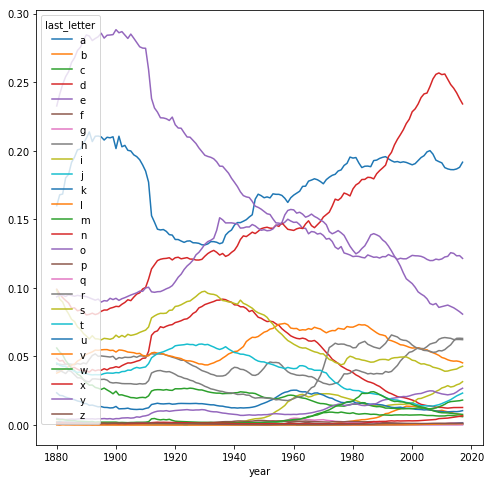

In [37]:
initial2 = df.groupby(['last_letter', 'year'])['relative_frequency'].sum().unstack(0).plot.line(figsize=(8,8))

# Visualization of letter frequency

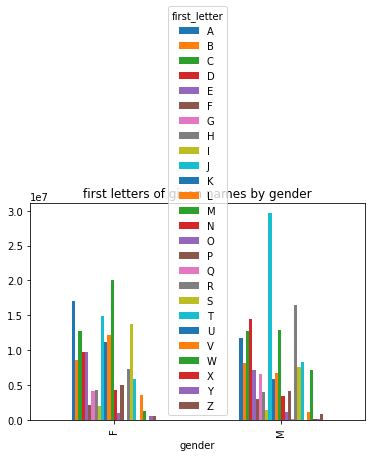

In [38]:
df8 = df.groupby(['gender', 'first_letter'])['occurence'].sum().unstack()
df8.plot.bar(title="first letters of given names by gender")

*The three most popular first letters for female names are 'M', 'A' and 'J' in that order.*

*The three most popular first letter for male names are 'T' (overwhelmingly), 'R' and 'D' in that order.*

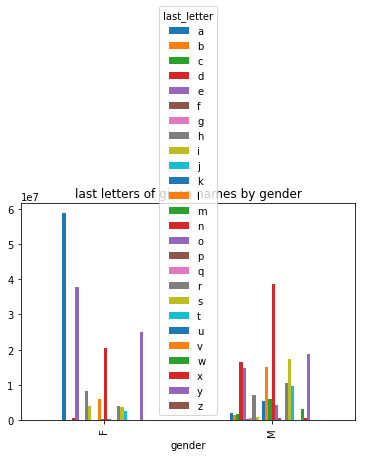

In [39]:
df9 = df.groupby(['gender', 'last_letter'])['occurence'].sum().unstack()
df9.plot.bar(title="last letters of given names by gender")

*Female names often end with the letters 'a', 'e' or 'y' in that order*

*Male names often end with the letters 'n', 'y' and 'd' in that order*

# e-rich Names

In [40]:
df = df.reset_index()

In [41]:
df['dfe'] = df['names'].str.count('e')

In [42]:
e4 = df[df['dfe'] > 3]
e4 = e4['names'].unique()
for i in e4:
    print(i)
len(e4)

Genevieve
Tennessee
Zebedee
Geneveive
Geneieve
Geneviene
Jenevieve
Beverlee
Geneiveve
Geneveve
Bernedette
Genievieve
Gennevieve
Genevee
Geneivieve
Mercedese
Jerelene
Gwenevere
Clementene
Jewelene
Queenester
Vernesteen
Gerelene
Jewellene
Deseree
Jennielee
Merelene
Jeweldene
Deedee
Bevereley
Clementeen
Leverette
Sherelene
Dellareese
Marietherese
Shereese
Deneene
Deeneen
Jeneene
Chereese
Guenevere
Shereece
Heatherlee
Keelee
Genesee
Keekee
Jeremee
Destenee
Sheereen
Jenniferlee
Jenelee
Jesselee
Desieree
Sheeneeka
Dezeree
Merecedes
Mercedees
Mercedee
Stephenee
Felipedejesus
Demetree
Heavenlee
Creedence
Kenedee
Kennedee
Cheyeene
Genessee
Mercedeez
Jewelee
Demeree
Neelee
Serenitee
Leelee
Greenlee
Independence
Jewellee
Jezebelle
Nevaehlee
Gwenevieve
Renesmee
Gweneviere
Temperence
Breelee
Annabellelee
Renezmee
Peneloperose
Menachemmendel
Jennevieve
Mendeecee
Mendeecees
Chimeremeze
Kreedence


92